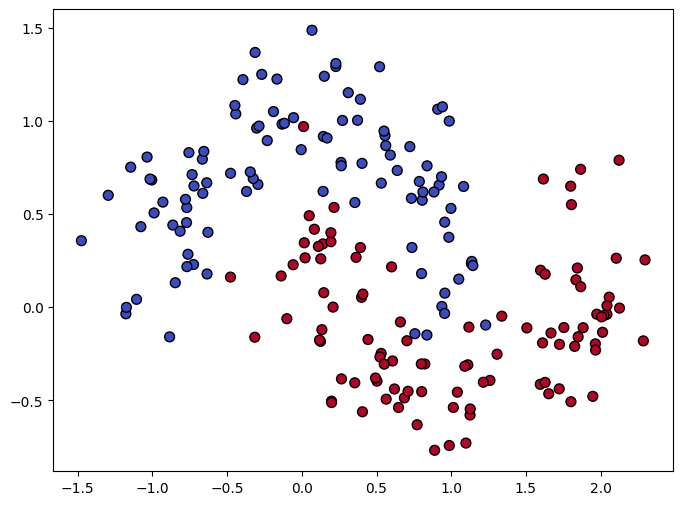

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Step 1: Create dataset (using make_moons for non-linear data)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Normalize the data (important for RBF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Use k-means to find the centers of the RBF
k = 10  # Number of RBF centers
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Compute the RBF kernel (Gaussian function) for each center
def rbf_kernel(X, centers, gamma=1.0):
    # Compute the Gaussian RBF for each point in X and each center
    dists = np.sum((X[:, np.newaxis] - centers)**2, axis=2)
    return np.exp(-gamma * dists)

# Step 5: Construct the feature matrix for the RBF Network
X_rbf = rbf_kernel(X_scaled, kmeans.cluster_centers_)

# Step 6: Train the output weights using Ridge regression (as linear combination of RBFs)
ridge = Ridge(alpha=1e-3)
ridge.fit(X_rbf, y)

# Step 7: Make predictions on the same data
y_pred = ridge.predict(X_rbf)

# Step 8: Visualize the results
plt.figure(figsize=(8, 6))

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', marker='o', label='Data')



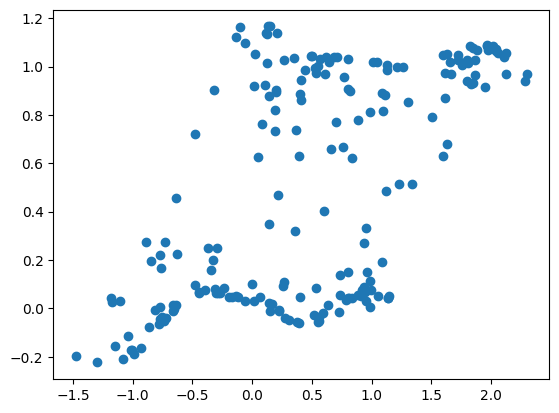

In [8]:
plt.scatter(X[:,0], y_pred)